In [22]:
import fidimag
from fidimag.micro import Sim
from fidimag.common import CuboidMesh
from fidimag.micro import Zeeman, Demag, DMI, UniformExchange
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Here we set parameters of the system. We choose a 300 x 80 x 3 nm$^3$ nanotrack, and apply periodicity in the x-direction to approximate an infinite nanotrack.

In [29]:
dx = dy = 2.5
dz = 1.0


Lx = 300.0
Ly = 80.0
Lz = 3.0
nx = int(Lx/dx)
ny = int(Ly/dy)
nz = int(Lz/dz)

mesh = CuboidMesh(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz,
                  unit_length=1e-9, periodicity=(True, False, False))

We choose material parameters for Fe0.7Co0.3Si as used in the paper "Skyrmions in thin films with easy-plane magnetocrystalline anisotropy" (http://dx.doi.org/10.1063/1.4945262). We set the initial state to be uniform in the +z direction.

In [30]:
Ms = 9.5e4  # magnetisation saturation (A/m)
A = 4e-13  # exchange stiffness (J/m)
D = 2.7e-4  # DMI constant (J/m**2)
H = (0, 0, 3.8e5)  # external magnetic field (A/m)

K0 = D**2 / A
K1 = -0.16*K0

alpha = 0.5  # Gilbert damping
gamma = 2.211e5  # gyromagnetic ratio (m/As)

sim  = Sim(mesh)  # create simulation object

# Set parameters.
sim.Ms = Ms
sim.driver.alpha = alpha
sim.driver.gamma = gamma
sim.driver.do_precession = False

# Add energies.
sim.add(UniformExchange(A=A))
sim.add(DMI(D))
sim.add(Zeeman(H))
sim.add(Demag(pbc_2d=True))
# Seed random number generator so that this simulation is reproducible.
np.random.seed(0)

def m_init(pos):
    m = np.random.uniform(-1, 1, 3)
    return m

sim.set_m(m_init, normalise=True)

We now relax the system to find a metastable state.

In [31]:
sim.driver.relax(dt=1e-13, stopping_dmdt=0.1, max_steps=5000, save_m_steps=None, save_vtk_steps=None)

#1    t=1e-13    dt=1e-13 max_dmdt=8.29e+04
#2    t=2e-13    dt=1e-13 max_dmdt=8.31e+04
#3    t=3e-13    dt=1e-13 max_dmdt=7.9e+04
#4    t=4e-13    dt=1e-13 max_dmdt=8.23e+04
#5    t=5e-13    dt=1e-13 max_dmdt=8.35e+04
#6    t=6e-13    dt=1e-13 max_dmdt=7.97e+04
#7    t=7e-13    dt=1e-13 max_dmdt=7.95e+04
#8    t=8e-13    dt=1e-13 max_dmdt=7.72e+04
#9    t=9e-13    dt=1e-13 max_dmdt=7.72e+04
#10   t=1e-12    dt=1e-13 max_dmdt=7.34e+04
#11   t=1.1e-12  dt=1e-13 max_dmdt=7.27e+04
#12   t=1.2e-12  dt=1e-13 max_dmdt=6.9e+04
#13   t=1.3e-12  dt=1e-13 max_dmdt=6.51e+04
#14   t=1.4e-12  dt=1e-13 max_dmdt=6.81e+04
#15   t=1.5e-12  dt=1e-13 max_dmdt=6.86e+04
#16   t=1.6e-12  dt=1e-13 max_dmdt=6.71e+04
#17   t=1.7e-12  dt=1e-13 max_dmdt=7.17e+04
#18   t=1.8e-12  dt=1e-13 max_dmdt=7.33e+04
#19   t=1.9e-12  dt=1e-13 max_dmdt=7.14e+04
#20   t=2e-12    dt=1e-13 max_dmdt=6.64e+04
#21   t=2.1e-12  dt=1e-13 max_dmdt=5.97e+04
#22   t=2.2e-12  dt=1e-13 max_dmdt=5.28e+04
#23   t=2.3e-12  dt=1e-13 max_dmdt

#181  t=2.6e-11  dt=2.91e-13 max_dmdt=9.33e+03
#182  t=2.63e-11 dt=2.91e-13 max_dmdt=9.47e+03
#183  t=2.65e-11 dt=2.91e-13 max_dmdt=9.59e+03
#184  t=2.68e-11 dt=2.91e-13 max_dmdt=9.67e+03
#185  t=2.71e-11 dt=2.91e-13 max_dmdt=9.72e+03
#186  t=2.74e-11 dt=2.91e-13 max_dmdt=1e+04
#187  t=2.77e-11 dt=2.91e-13 max_dmdt=1.06e+04
#188  t=2.8e-11  dt=2.91e-13 max_dmdt=1.11e+04
#189  t=2.83e-11 dt=2.91e-13 max_dmdt=1.17e+04
#190  t=2.86e-11 dt=2.91e-13 max_dmdt=1.22e+04
#191  t=2.89e-11 dt=2.91e-13 max_dmdt=1.27e+04
#192  t=2.92e-11 dt=2.91e-13 max_dmdt=1.32e+04
#193  t=2.95e-11 dt=2.91e-13 max_dmdt=1.36e+04
#194  t=2.97e-11 dt=2.91e-13 max_dmdt=1.4e+04
#195  t=3e-11    dt=2.91e-13 max_dmdt=1.43e+04
#196  t=3.03e-11 dt=2.91e-13 max_dmdt=1.45e+04
#197  t=3.06e-11 dt=2.91e-13 max_dmdt=1.47e+04
#198  t=3.09e-11 dt=2.91e-13 max_dmdt=1.48e+04
#199  t=3.12e-11 dt=2.91e-13 max_dmdt=1.48e+04
#200  t=3.15e-11 dt=2.91e-13 max_dmdt=1.47e+04
#201  t=3.18e-11 dt=2.91e-13 max_dmdt=1.45e+04
#202  t=3.21e-11 

#357  t=9.58e-11 dt=8.15e-13 max_dmdt=1.75e+03
#358  t=9.66e-11 dt=8.15e-13 max_dmdt=1.76e+03
#359  t=9.74e-11 dt=8.15e-13 max_dmdt=1.77e+03
#360  t=9.82e-11 dt=8.15e-13 max_dmdt=1.77e+03
#361  t=9.9e-11  dt=8.15e-13 max_dmdt=1.78e+03
#362  t=9.98e-11 dt=8.15e-13 max_dmdt=1.78e+03
#363  t=1.01e-10 dt=8.15e-13 max_dmdt=1.78e+03
#364  t=1.01e-10 dt=8.15e-13 max_dmdt=1.79e+03
#365  t=1.02e-10 dt=8.15e-13 max_dmdt=1.79e+03
#366  t=1.03e-10 dt=8.15e-13 max_dmdt=1.79e+03
#367  t=1.04e-10 dt=8.15e-13 max_dmdt=1.79e+03
#368  t=1.05e-10 dt=8.15e-13 max_dmdt=1.79e+03
#369  t=1.06e-10 dt=8.15e-13 max_dmdt=1.82e+03
#370  t=1.07e-10 dt=1.24e-12 max_dmdt=1.87e+03
#371  t=1.08e-10 dt=1.24e-12 max_dmdt=1.94e+03
#372  t=1.09e-10 dt=1.24e-12 max_dmdt=2e+03
#373  t=1.1e-10  dt=1.24e-12 max_dmdt=2.06e+03
#374  t=1.12e-10 dt=1.24e-12 max_dmdt=2.11e+03
#375  t=1.13e-10 dt=1.24e-12 max_dmdt=2.17e+03
#376  t=1.14e-10 dt=1.24e-12 max_dmdt=2.22e+03
#377  t=1.15e-10 dt=1.24e-12 max_dmdt=2.27e+03
#378  t=1.17e-10

#539  t=5.26e-10 dt=8.04e-12 max_dmdt=351
#540  t=5.34e-10 dt=8.04e-12 max_dmdt=351
#541  t=5.42e-10 dt=8.04e-12 max_dmdt=351
#542  t=5.51e-10 dt=8.04e-12 max_dmdt=350
#543  t=5.59e-10 dt=8.04e-12 max_dmdt=352
#544  t=5.67e-10 dt=8.04e-12 max_dmdt=356
#545  t=5.75e-10 dt=8.04e-12 max_dmdt=359
#546  t=5.83e-10 dt=8.04e-12 max_dmdt=362
#547  t=5.91e-10 dt=8.04e-12 max_dmdt=364
#548  t=5.99e-10 dt=8.04e-12 max_dmdt=366
#549  t=6.07e-10 dt=8.04e-12 max_dmdt=367
#550  t=6.15e-10 dt=8.04e-12 max_dmdt=368
#551  t=6.23e-10 dt=8.04e-12 max_dmdt=367
#552  t=6.31e-10 dt=8.04e-12 max_dmdt=366
#553  t=6.39e-10 dt=8.04e-12 max_dmdt=364
#554  t=6.47e-10 dt=8.04e-12 max_dmdt=366
#555  t=6.55e-10 dt=8.04e-12 max_dmdt=369
#556  t=6.63e-10 dt=8.04e-12 max_dmdt=373
#557  t=6.71e-10 dt=8.04e-12 max_dmdt=375
#558  t=6.79e-10 dt=8.04e-12 max_dmdt=377
#559  t=6.87e-10 dt=8.04e-12 max_dmdt=378
#560  t=6.95e-10 dt=8.04e-12 max_dmdt=378
#561  t=7.03e-10 dt=8.04e-12 max_dmdt=378
#562  t=7.11e-10 dt=8.04e-12 max_d

#735  t=2.69e-09 dt=1.82e-11 max_dmdt=294
#736  t=2.71e-09 dt=1.82e-11 max_dmdt=297
#737  t=2.73e-09 dt=1.82e-11 max_dmdt=297
#738  t=2.75e-09 dt=1.82e-11 max_dmdt=296
#739  t=2.77e-09 dt=1.82e-11 max_dmdt=293
#740  t=2.78e-09 dt=1.82e-11 max_dmdt=287
#741  t=2.8e-09  dt=1.82e-11 max_dmdt=282
#742  t=2.82e-09 dt=1.82e-11 max_dmdt=279
#743  t=2.84e-09 dt=1.82e-11 max_dmdt=274
#744  t=2.86e-09 dt=1.82e-11 max_dmdt=266
#745  t=2.88e-09 dt=1.82e-11 max_dmdt=257
#746  t=2.89e-09 dt=1.82e-11 max_dmdt=245
#747  t=2.91e-09 dt=1.82e-11 max_dmdt=232
#748  t=2.93e-09 dt=1.82e-11 max_dmdt=217
#749  t=2.94e-09 dt=1.35e-11 max_dmdt=204
#750  t=2.96e-09 dt=1.35e-11 max_dmdt=193
#751  t=2.97e-09 dt=1.35e-11 max_dmdt=181
#752  t=2.98e-09 dt=1.35e-11 max_dmdt=172
#753  t=3e-09    dt=1.35e-11 max_dmdt=163
#754  t=3.01e-09 dt=1.35e-11 max_dmdt=153
#755  t=3.02e-09 dt=1.35e-11 max_dmdt=144
#756  t=3.04e-09 dt=1.35e-11 max_dmdt=134
#757  t=3.05e-09 dt=1.35e-11 max_dmdt=125
#758  t=3.07e-09 dt=1.35e-11 max_d

#929  t=8.67e-09 dt=5.43e-11 max_dmdt=26.8
#930  t=8.73e-09 dt=5.43e-11 max_dmdt=26.4
#931  t=8.78e-09 dt=5.43e-11 max_dmdt=26
#932  t=8.84e-09 dt=5.43e-11 max_dmdt=25.6
#933  t=8.89e-09 dt=5.43e-11 max_dmdt=25.2
#934  t=8.95e-09 dt=5.43e-11 max_dmdt=24.8
#935  t=9e-09    dt=5.43e-11 max_dmdt=24.3
#936  t=9.08e-09 dt=8.17e-11 max_dmdt=23.8
#937  t=9.16e-09 dt=8.17e-11 max_dmdt=23.1
#938  t=9.25e-09 dt=8.17e-11 max_dmdt=22.5
#939  t=9.33e-09 dt=8.17e-11 max_dmdt=21.8
#940  t=9.41e-09 dt=8.17e-11 max_dmdt=21.2
#941  t=9.49e-09 dt=8.17e-11 max_dmdt=20.5
#942  t=9.57e-09 dt=8.17e-11 max_dmdt=19.8
#943  t=9.65e-09 dt=8.17e-11 max_dmdt=19.2
#944  t=9.74e-09 dt=8.17e-11 max_dmdt=18.6
#945  t=9.82e-09 dt=8.17e-11 max_dmdt=17.9
#946  t=9.9e-09  dt=8.17e-11 max_dmdt=17.3
#947  t=9.98e-09 dt=8.17e-11 max_dmdt=16.7
#948  t=1.01e-08 dt=8.17e-11 max_dmdt=16.1
#949  t=1.01e-08 dt=8.17e-11 max_dmdt=15.5
#950  t=1.02e-08 dt=8.17e-11 max_dmdt=15
#951  t=1.03e-08 dt=8.17e-11 max_dmdt=14.4
#952  t=1.04e-0

#1121 t=2.43e-08 dt=8.93e-11 max_dmdt=23
#1122 t=2.44e-08 dt=8.93e-11 max_dmdt=22.9
#1123 t=2.45e-08 dt=8.93e-11 max_dmdt=22.6
#1124 t=2.46e-08 dt=8.93e-11 max_dmdt=22.3
#1125 t=2.47e-08 dt=8.93e-11 max_dmdt=22
#1126 t=2.48e-08 dt=8.93e-11 max_dmdt=21.7
#1127 t=2.49e-08 dt=8.93e-11 max_dmdt=21.3
#1128 t=2.49e-08 dt=8.93e-11 max_dmdt=20.8
#1129 t=2.5e-08  dt=8.93e-11 max_dmdt=20.3
#1130 t=2.51e-08 dt=8.93e-11 max_dmdt=19.6
#1131 t=2.52e-08 dt=8.93e-11 max_dmdt=18.8
#1132 t=2.53e-08 dt=8.93e-11 max_dmdt=18
#1133 t=2.54e-08 dt=8.93e-11 max_dmdt=17.2
#1134 t=2.55e-08 dt=8.93e-11 max_dmdt=16.3
#1135 t=2.56e-08 dt=8.93e-11 max_dmdt=15.7
#1136 t=2.57e-08 dt=8.93e-11 max_dmdt=15.8
#1137 t=2.57e-08 dt=8.93e-11 max_dmdt=16.1
#1138 t=2.58e-08 dt=8.93e-11 max_dmdt=16.3
#1139 t=2.59e-08 dt=8.93e-11 max_dmdt=16.5
#1140 t=2.6e-08  dt=8.93e-11 max_dmdt=16.7
#1141 t=2.61e-08 dt=8.93e-11 max_dmdt=17
#1142 t=2.62e-08 dt=8.93e-11 max_dmdt=17.2
#1143 t=2.63e-08 dt=8.93e-11 max_dmdt=17.4
#1144 t=2.64e-08 dt

#1313 t=3.49e-08 dt=4.08e-11 max_dmdt=61.5
#1314 t=3.49e-08 dt=4.08e-11 max_dmdt=63.7
#1315 t=3.49e-08 dt=4.08e-11 max_dmdt=65.8
#1316 t=3.5e-08  dt=4.08e-11 max_dmdt=67.8
#1317 t=3.5e-08  dt=4.08e-11 max_dmdt=69.6
#1318 t=3.51e-08 dt=4.08e-11 max_dmdt=71.4
#1319 t=3.51e-08 dt=4.08e-11 max_dmdt=73.5
#1320 t=3.52e-08 dt=4.08e-11 max_dmdt=75.3
#1321 t=3.52e-08 dt=4.08e-11 max_dmdt=76.7
#1322 t=3.52e-08 dt=4.08e-11 max_dmdt=77.7
#1323 t=3.53e-08 dt=4.08e-11 max_dmdt=78.2
#1324 t=3.53e-08 dt=4.08e-11 max_dmdt=78.1
#1325 t=3.54e-08 dt=4.08e-11 max_dmdt=77.4
#1326 t=3.54e-08 dt=4.08e-11 max_dmdt=76.3
#1327 t=3.54e-08 dt=4.08e-11 max_dmdt=77
#1328 t=3.55e-08 dt=4.08e-11 max_dmdt=77.4
#1329 t=3.55e-08 dt=4.08e-11 max_dmdt=77.3
#1330 t=3.56e-08 dt=4.08e-11 max_dmdt=76.7
#1331 t=3.56e-08 dt=4.08e-11 max_dmdt=75.7
#1332 t=3.56e-08 dt=4.08e-11 max_dmdt=74.2
#1333 t=3.57e-08 dt=4.08e-11 max_dmdt=72.4
#1334 t=3.57e-08 dt=4.08e-11 max_dmdt=70.1
#1335 t=3.58e-08 dt=4.08e-11 max_dmdt=67.6
#1336 t=3.58e

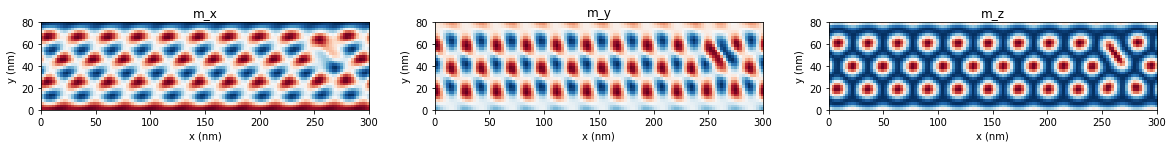

In [32]:
def plot_field(field, sim, fieldname, layer=0):
    nx = sim.mesh.nx
    ny = sim.mesh.ny
    n_layer = sim.mesh.nx * sim.mesh.ny
    m = field.reshape(-1, 3)
    
    fx = m[:, 0][layer*n_layer:(layer+1)*n_layer]
    fy = m[:, 1][layer*n_layer:(layer+1)*n_layer]
    fz = m[:, 2][layer*n_layer:(layer+1)*n_layer]
    fx.shape = (ny, nx)
    fy.shape = (ny, nx)
    fz.shape = (ny, nx)
    
    extent = [0, nx*sim.mesh.dx, 0, ny*sim.mesh.dy]
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(fx, extent=extent, cmap='RdBu', origin='lower')
    plt.title('{}_x'.format(fieldname))
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.subplot(1, 3, 2)
    plt.imshow(fy, extent=extent, cmap='RdBu', origin='lower')
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.title('{}_y'.format(fieldname))
    plt.subplot(1, 3, 3)
    plt.imshow(fz, extent=extent, cmap='RdBu', origin='lower')
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.title('{}_z'.format(fieldname))
    
plot_field(sim.spin, sim, 'm')

We now apply a field gradient which acts to move the Skyrmions. Below we construct a function to impose this gradient, and just plot the resulting Zeeman field.

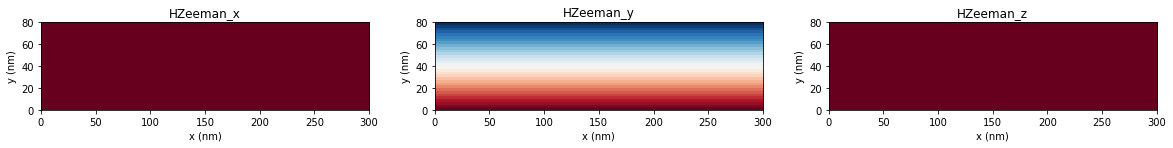

In [33]:
H0 = 0.4 / (4*np.pi*1e-7) # Apply a field of 0.4T

def H_Gradient(pos):
    x, y, z = pos
    return (0, H0 * y/Ly, 0)

zee = Zeeman(H_Gradient)
sim.add(zee)
plot_field(zee.field, sim, 'HZeeman')

We now evolve in time, showing snapshots of the magnetisation every 5ns.

i = 0, t = 0.0ns
i = 1, t = 1e-09ns
i = 2, t = 2e-09ns
i = 3, t = 3.0000000000000004e-09ns
i = 4, t = 4e-09ns
i = 5, t = 5e-09ns
i = 6, t = 6.000000000000001e-09ns
i = 7, t = 7.000000000000001e-09ns
i = 8, t = 8e-09ns
i = 9, t = 9.000000000000001e-09ns
i = 10, t = 1e-08ns


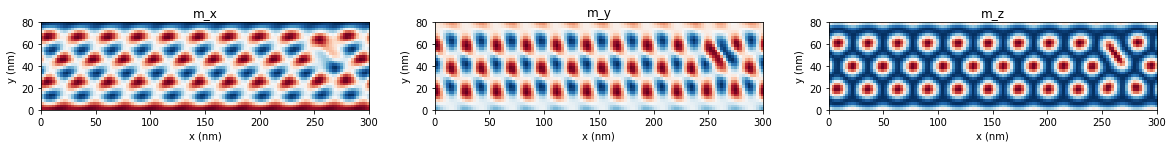

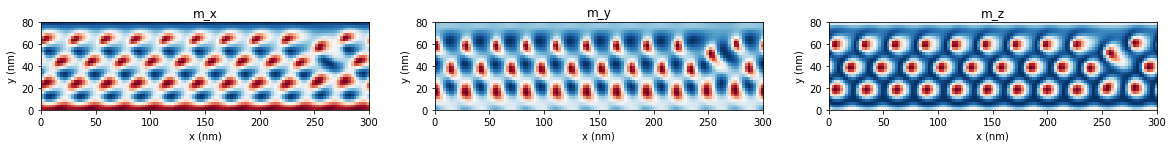

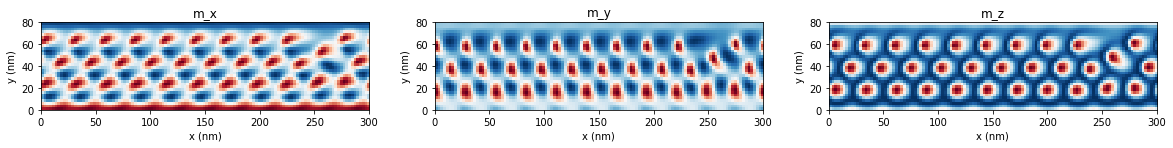

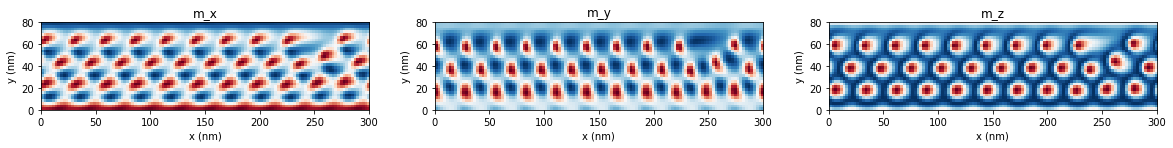

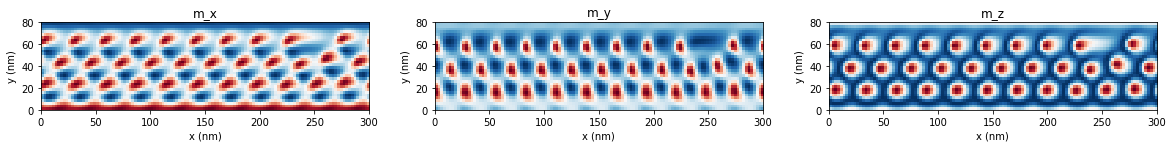

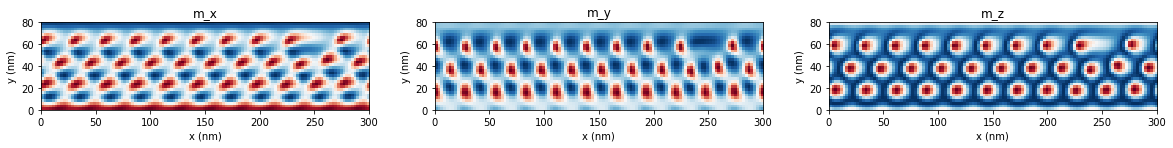

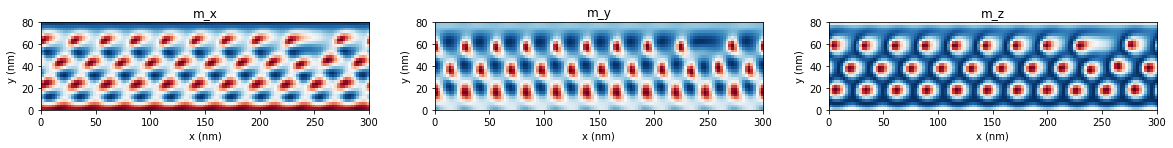

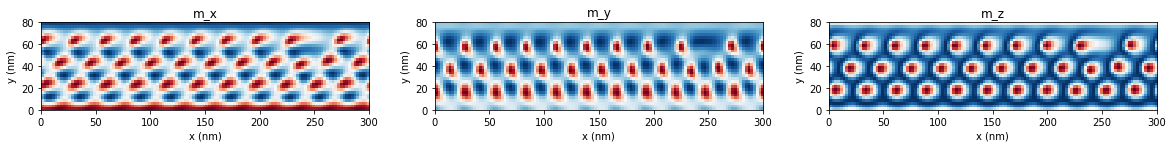

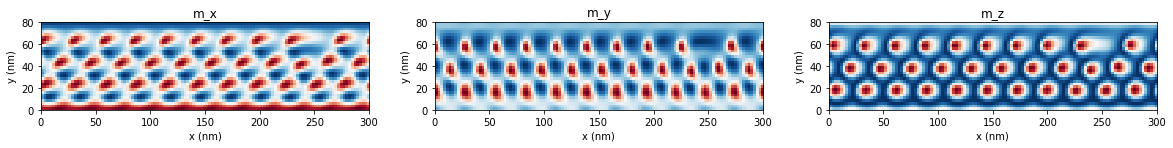

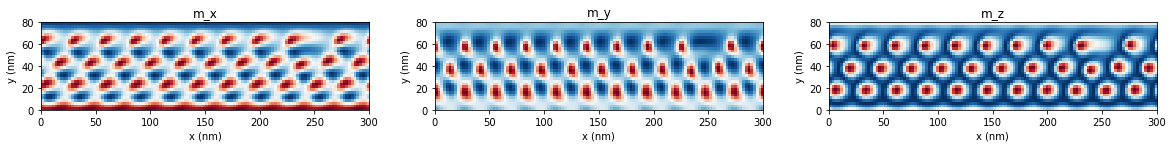

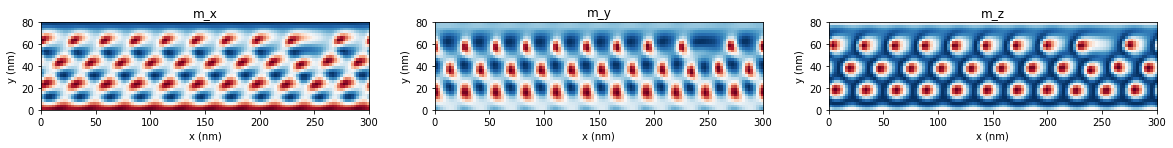

In [34]:
sim.driver.reset_integrator()
for i, t in enumerate(np.linspace(0, 10e-9, 11)):
    print('i = {}, t = {}ns'.format(i, t))
    sim.driver.run_until(t)
    plot_field(sim.spin, sim, 'm')


We can see that the core of the Skyrmions in the high-field region is smaller than than in the low field region, and there is some motion away from this area boundary.

We can also plot particular fields:

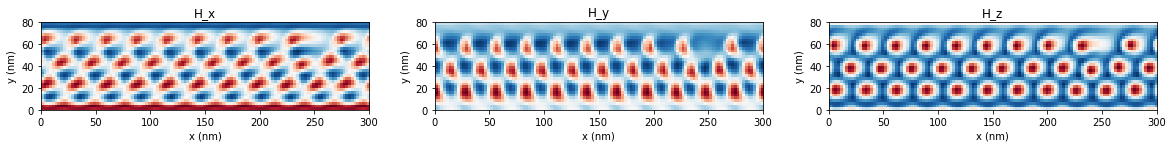

In [35]:
# Plot the Effective Field
plot_field(sim.driver.field, sim, 'H')

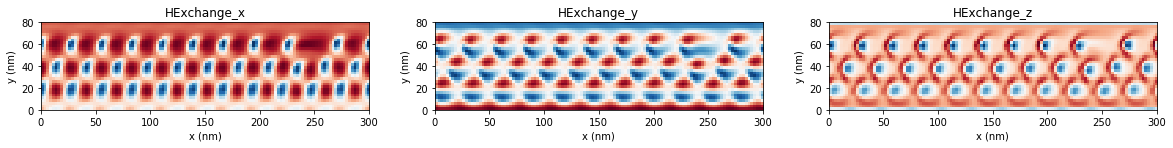

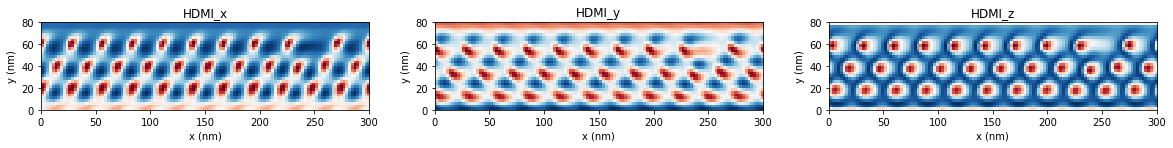

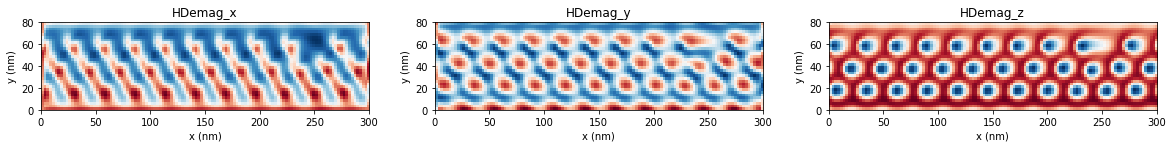

In [36]:
plot_field(sim.get_interaction('UniformExchange').field, sim, 'HExchange')

plot_field(sim.get_interaction('DMI').field, sim, 'HDMI')

plot_field(sim.get_interaction('Demag').field, sim, 'HDemag')